IMPORTING LIBRARIES AND THE DATA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

df = pd.read_csv('data.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# DATA WRANGLING

In [5]:
pd.options.mode.chained_assignment = None #turn off the SettingWithCopyWarning warning that is raised
#when assigning values to a slice of a DataFrame.
#This code sets some default configurations for Matplotlib plots by updating the rcParams dictionary.
plt.rcParams.update(
{"font.size": 10, "figure.facecolor": "w", "axes.facecolor": "w", "axes.spines.right": False,"axes.spines.top"
: False, "axes.spines.bottom": False,
"xtick.top": False,
"xtick.bottom": False,
"ytick.right": False,
"ytick.left": False,
}
)

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [8]:
df.info() #Overall view of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df.describe() #lokking at the numeric info of the dataset

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df.shape #INSPECTING THE DIMENSION OF THE DATA SET

(541909, 8)

# DATA CLEANING AND HANDLING MISSING VALUES

In [11]:
#Check for missing values
missing_values = df.isnull().sum()

#checking for duplicates
duplicate_rows = df.duplicated().sum()

missing_values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
duplicate_rows

5268

In [13]:
#checking for negative values in Quantity and Unit price
negative_quantity = df[df['Quantity'] < 0].shape[0]
negative_unit_price = df[df['UnitPrice'] < 0].shape[0]
negative_quantity

10624

In [14]:
negative_unit_price

2

In [15]:
#Display rows with negative quantities
negative_quantity_rows = df[df['Quantity'] < 0].head()
negative_quantity_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [16]:
#Displaying rows with negative unit prices
negative_unit_price_rows = df[df['UnitPrice'] < 0]
negative_unit_price_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [17]:
#Fill missing values
df['Description'].fillna('Unkown', inplace=True)
df['CustomerID'].fillna(-1, inplace=True)

#Removing Duplicate Data
df.drop_duplicates(inplace=True)


In [18]:
#Check the DataFrame for missing values again
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
#Check the DataFrame for duplicates again
df.duplicated().sum()

0

In [20]:
#With the clean data, we now convert columns with proper dataTypes
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Quantity'] = pd.to_numeric(df['Quantity'])
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [21]:
#Next, we create new columns, that is the column for time, month, day, year

df['Time'] = df['InvoiceDate'].dt.time
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Day'] = df['InvoiceDate'].dt.day_name()
df['Year'] = df['InvoiceDate'].dt.year

#Next we create a column for the total coast

df['Total'] = df['Quantity']*df['UnitPrice']

#View the changes
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34


# STRUCTURING THE DATASET

<AxesSubplot:ylabel='Quantity'>

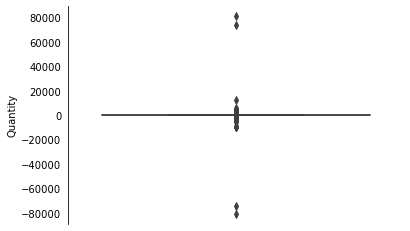

In [22]:
# Checking for the Distribution of the Quantity using seabon

sns.boxplot(y = 'Quantity', data=df)

In [23]:
#There are values under quantity which are under 0
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,09:41:00,December,Wednesday,2010,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,09:49:00,December,Wednesday,2010,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,10:24:00,December,Wednesday,2010,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,December,Wednesday,2010,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,December,Wednesday,2010,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,09:57:00,December,Friday,2011,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,10:28:00,December,Friday,2011,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,11:57:00,December,Friday,2011,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,11:58:00,December,Friday,2011,-1.25


In [24]:
#Remove the negative values from the dataframe
#Negative values means products were not purchased

#this creates a separate dataframe for products that were not purchased
negative_purchases = df[df['Quantity'] < 0]

#Next we modify the main dataframe to accomodate purchased products only
df = df[df['Quantity'] > 0]

#check the minimum value to confirm positive quantities only are available
df['Quantity'].min()

1

<AxesSubplot:ylabel='UnitPrice'>

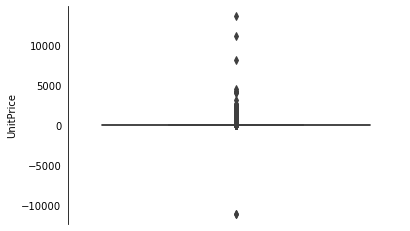

In [25]:
#NEXT, WE CHECKING THE DISTRIBUTION OF THE UNIT PRICE IN THE DATASET

sns.boxplot(y = 'UnitPrice', data = df)

In [26]:
#Next we have to remove the negative values in unit price
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,-1.0,United Kingdom,14:51:00,August,Friday,2011,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,-1.0,United Kingdom,14:52:00,August,Friday,2011,-11062.06


In [27]:
#The negative values are associated with dept in the description hence use it to remove them
deptValue = df['Description'].str.contains('debt', case=False, na = False)
# Invert mask and use boolean indexing to filter out rows
df = df[~deptValue]

#Filter the data
df = df[df['UnitPrice'] > 0]

#Finally check the minimum value to validate
df['UnitPrice'].min()

0.001

# ANALYSIS OF THE CLEAN AND STRUCTURED DATA

In [28]:
# Get the top 10 most popular products based on quantity sold
top_products = df.groupby('Description').agg({'Quantity': 'sum'}).sort_values('Quantity', ascending=False).head(10)

top_products

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
JUMBO BAG RED RETROSPOT,48371
WHITE HANGING HEART T-LIGHT HOLDER,37872
POPCORN HOLDER,36749
PACK OF 72 RETROSPOT CAKE CASES,36396
ASSORTED COLOUR BIRD ORNAMENT,36362
RABBIT NIGHT LIGHT,30739


In [29]:
# Compute total sales for each country
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
sales_by_country = df.groupby('Country').agg({'TotalSales': 'sum'}).sort_values('TotalSales', ascending=False)

sales_by_country

,TotalSales
Country,
United Kingdom,8.990682e+06
Netherlands,2.854463e+05
EIRE,2.831405e+05
Germany,2.286784e+05
France,2.096254e+05
Australia,1.384538e+05
Spain,6.155856e+04
Switzerland,5.706760e+04
Belgium,4.119634e+04


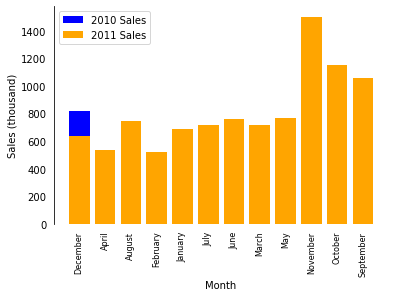

In [30]:
#ANALYZE THE BEST MONTH FOR SALES
#[['Total']] means that it will sum up on Total field and display as Month | Total
sales_2010 = df[df['Year']== 2010].groupby('Month').sum()[['Total']].reset_index()
sales_2011 = df[df['Year']== 2011].groupby('Month').sum()[['Total']].reset_index()



plt.bar(sales_2010["Month"],sales_2010['Total']/1000, label='2010 Sales', color='blue')
plt.bar(sales_2011["Month"],sales_2011['Total']/1000, label='2011 Sales', color='orange')
plt.xticks(rotation = 'vertical',size = 8)
plt.ylabel("Sales (thousand)")
plt.xlabel("Month")
plt.legend()
plt.show()

Based on the bar grapg analysis above, it is clear that the month with the highest total sales in 2011 is November, followed by October and September, while April and February had the least total sales. As for the year 2010, data was only available for December.

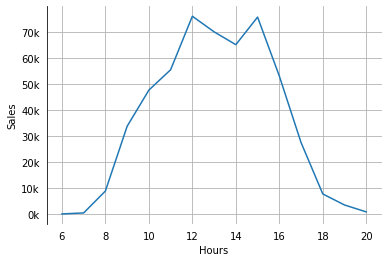

In [31]:
#Predicting the best time to advertise to maximize likelihood of consumers to purchase

#create a new column for hours from the InvoiceDate column
df['Hour'] = df['InvoiceDate'].dt.hour

advertisementTime = df.groupby('Hour').count().reset_index()

from matplotlib.ticker import StrMethodFormatter
plt.plot(advertisementTime['Hour'], advertisementTime['InvoiceNo']/1000)
plt.xlabel('Hours')
plt.ylabel('Sales')
plt.grid()
formatter = StrMethodFormatter('{x:.0f}k')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

According to the prediction curve above, 
the ideal time for the company to run ads is 
between 12PM and 3PM as this time period yields the highest sales.

In [32]:
#Determine the products that were sold the most in the financial year
most_sold_product = df.groupby('Description').sum()[['Quantity']].reset_index()

most_sold_product = most_sold_product.sort_values('Quantity', ascending = False).head(10)

most_sold_product

,Description,Quantity
2386,"PAPER CRAFT , LITTLE BIRDIE",80995
2051,MEDIUM CERAMIC TOP STORAGE JAR,78033
3933,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
1815,JUMBO BAG RED RETROSPOT,48371
3843,WHITE HANGING HEART T-LIGHT HOLDER,37872
2680,POPCORN HOLDER,36749
2336,PACK OF 72 RETROSPOT CAKE CASES,36396
227,ASSORTED COLOUR BIRD ORNAMENT,36362
2740,RABBIT NIGHT LIGHT,30739
2106,MINI PAINT SET VINTAGE,26633


Text(0, 0.5, 'Product Description')

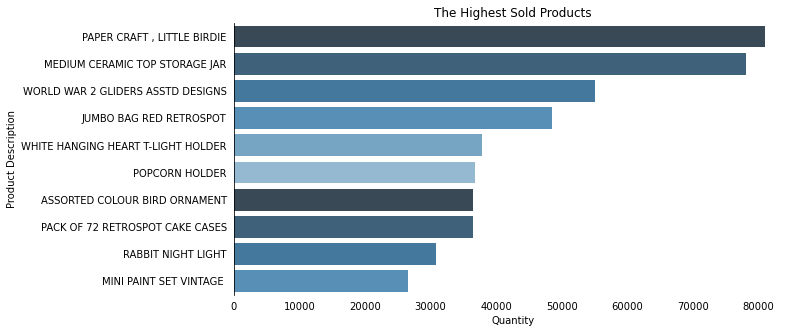

In [56]:
#visualizing the highest sold products
palet = sns.color_palette('Blues_d')
palet.reverse()
plt.figure(figsize = (10, 5))

high = sns.barplot(y = 'Description', x = 'Quantity', data = most_sold_product, palette = palet)
plt.title('The Highest Sold Products')
plt.ylabel('Product Description')

From the above plot, We determine that the above products are sold the most with paper craft being the most sold

In [33]:
#Determining the day of the week with more number of sales

sales_per_day = df.groupby('Day').count()[['InvoiceNo']].reset_index()
sales_per_day.columns = ['Day', 'Sales']
sales_per_day.sort_values(by = 'Sales', ascending = False)

,Day,Sales
3,Thursday,100213
4,Tuesday,98726
1,Monday,92466
5,Wednesday,91467
0,Friday,79666
2,Sunday,62339


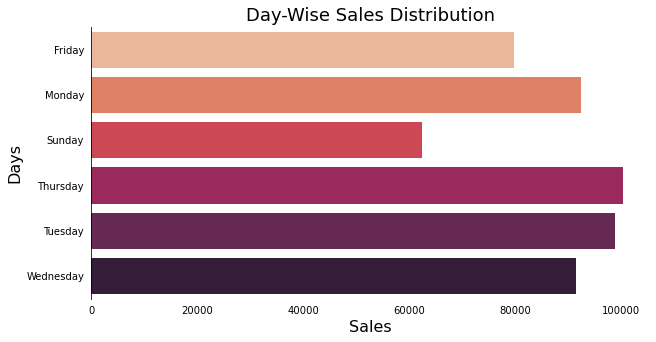

In [34]:
#Vizualizing the day of the week with the highest sales

palet = sns.color_palette('rocket')
palet.reverse()
plt.figure(figsize = (10, 5))

axis = sns.barplot(y = 'Day', x = 'Sales', data = sales_per_day, palette = palet)
plt.title('Day-Wise Sales Distribution', fontsize = 18)
plt.ylabel('Days', fontsize = 16)
plt.xlabel('Sales', fontsize = 16)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

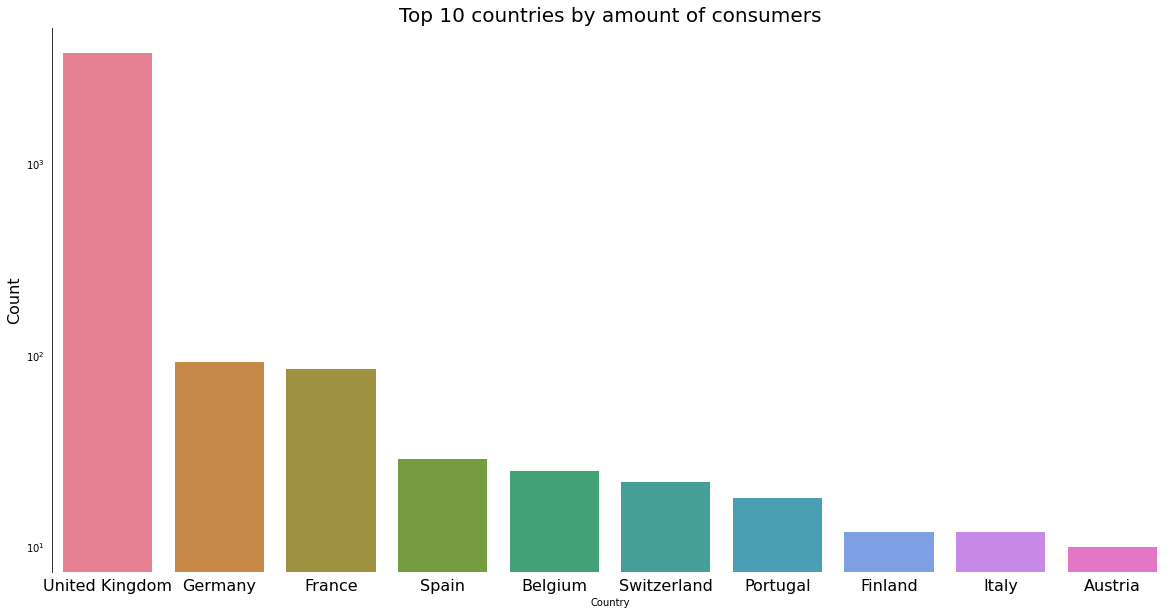

In [35]:
#Determing the top 10 countries with the most amount of customers

#Filter out sales of year 2011
sales_2011 = df[df['Year'] == 2011]
#calculate the amount of consumers by country
country_consumers = sales_2011.groupby(['Country'])['CustomerID'].nunique().reset_index().sort_values('CustomerID', ascending=False).head(10)
#Visualizing the top 10 countries by amount of customers
plt.figure(figsize = (20,10))
axis = sns.barplot(data = country_consumers, x = 'Country', y = 'CustomerID', palette = 'husl')
plt.title('Top 10 countries by amount of consumers', fontsize = 20)
plt.ylabel('Count', fontsize = 16)
plt.yscale('log')
plt.xticks(fontsize = 16)
plt.show

<AxesSubplot:>

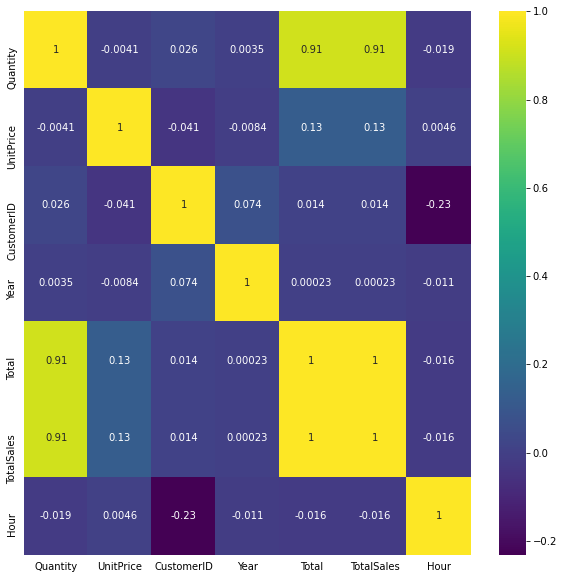

In [50]:
cm = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data = cm, annot = True, cmap = 'viridis')


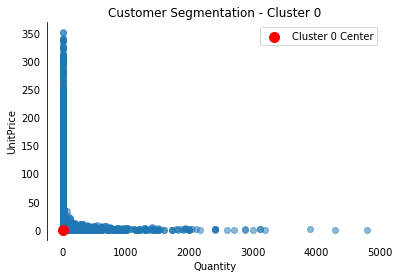

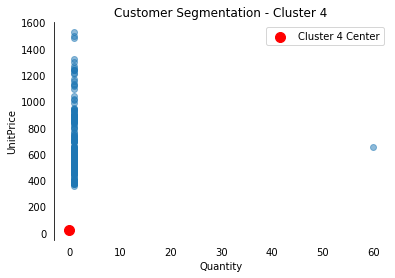

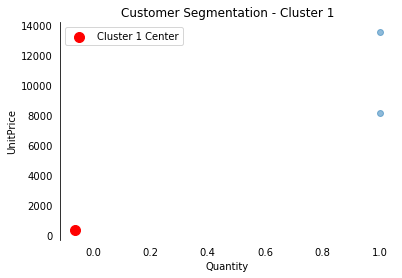

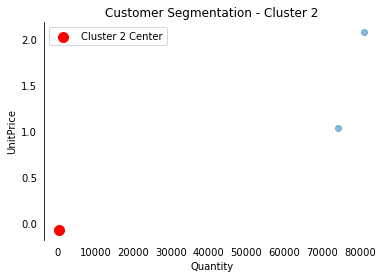

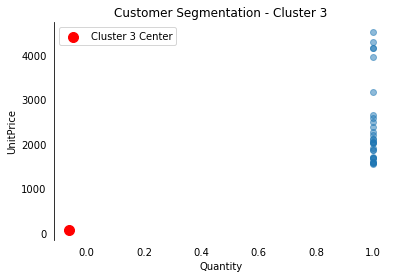

In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Feature selection for segmentation
features = ["Quantity", "UnitPrice"]

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Apply K-means clustering
num_clusters = 5  # You can adjust the number of clusters as per your preference
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Get the unique cluster labels
unique_clusters = df["Cluster"].unique()

for cluster_label in unique_clusters:
    cluster_data = df[df["Cluster"] == cluster_label]
    #plt.figure(figsize=(8, 6))
    plt.scatter(cluster_data['Quantity'], cluster_data['UnitPrice'], alpha=0.5)
    plt.scatter(kmeans.cluster_centers_[cluster_label, 0], kmeans.cluster_centers_[cluster_label, 1], s=100, c='red', label=f'Cluster {cluster_label} Center')
    plt.xlabel('Quantity')
    plt.ylabel('UnitPrice')
    plt.title(f'Customer Segmentation - Cluster {cluster_label}')
    plt.legend()
    plt.show()

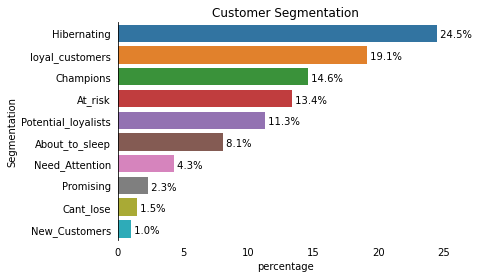

In [51]:
#CUSTOMER SEGMENTATION USING RFM ('Recency', 'Frequency', 'Monetary') SEGMENTATION


# creat a copy of the data
copy = df.copy()

# Set our data to rfm Analysis
recent_date = copy['InvoiceDate'].max()
rfm = copy.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (recent_date - date.max()).days,
    'InvoiceNo': lambda num: num.nunique(),
    'Total': lambda CheckoutPrice: CheckoutPrice.sum()
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Set Recency Score
rfm['Recency_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

# Set Frequency Score
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Set Monatry Score
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Set RFM Score
rfm['RFM_Score'] = (rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str) )
                    
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_risk',
    r'[1-2]5': 'Cant_lose',
    r'3[1-2]': 'About_to_sleep',
    r'33' : 'Need_Attention',
    r'[3-4][4-5]' : 'loyal_customers',
    r'41' : 'Promising',
    r'51' : 'New_Customers' ,
    r'[4-5][1-3]': 'Potential_loyalists',
    r'5[4-5]': 'Champions'
}

rfm['Segment'] = rfm['RFM_Score'].replace(seg_map, regex=True)

# Bar Plot for Our segments
Segments = (rfm['Segment'].value_counts(normalize=True) * 100).reset_index(name='percentage').round(1)


sns.barplot(y='index', x='percentage', data=Segments)

for i, v in enumerate(Segments['percentage']):
    plt.text(v, i + 0.20, " {:.1f}".format(v) + "%",  ha="left")

plt.ylabel('Segmentation')
plt.title('Customer Segmentation')
plt.show()

From the above segmentation, we determine that;
24.1% of the customers are in the hibernation segment and that for customers who have purchased from us a few times and the last time was a long time
18.4% of the customers are loyal and usually buys from us
14.8% of the customers are champions so we are their favourtie market
14.4% of the customers have good potential that refers to customers who have bought from us recently and have not buy many times
14.1% of the customers are at risk segment so we must attract them again
8.4% of the customers are about to sleep and this segment of customers who last purchase from us for a fairly long time
4.2% of the customers are needing more attention to make them fall under Champions segment
1.6% of the customers can't lost them and they purchased from us many times but last time was for a long time